
# Оцінка та вдосконалення моделі


<h2>Мета</h2>

Ознайомитись з методами оцінки та вдосконалення регресійних моделей. Після завершення цієї лабораторної роботи ви зможете:

* Розділяти дані на навчальну та тестову вибірки
* Використовувати перехресну перевірку для оцінки якості моделі
* Обирати оптимальну складність моделі для уникнення перенавчання
* Вдосконалювати моделі прогнозування за допомогою підбору параметрів


<div class="alert alert-danger alertdanger" style="margin-top: 20px">

# <h1 id="task">Завдання, що оцінюються </h1>

</div>


1. Скачайте дані із файлу <a href="https://drive.google.com/file/d/1wSj5SKRPKOjNPP2cyqaNpxRCinKEmJkO/view?usp=drive_link" target="_blank">'clean_data2.csv'</a> (Data2.csv з виправленими помилками та заповненими пропусками). Запишіть дані у два датафрейми: предиктори (x_data) та відгуки (y_data). Випадковим чином розділіть дані на навчальні та тестові (використайте 20% загального набору в якості тестових даних).
2. Побудуйте модель лінійної одномірної регресії для одного з предикторів, використовуючи навчальні дані. Знайдіть R^2 на навчальних та тестових даних. Чому вони різні і на який з них треба орієнтуватись при виборі моделі?
3. Побудуйте кілька поліноміальних моделей різних ступенів для того ж предиктора. Знайдіть R^2 цих моделей на тестових даних. Яка з моделей краща? При якому ступені полінома спостерігається перенавчання?
4. Побудуйте модель гребеневої регресії для двох найкращих предикторів. Параметр alpha повинен бути встановлений на 10. Обчисліть R^2.
5. Виконайте пошук по сітці для параметра alpha та параметра нормалізації, а потім побудуйте модель, використавши найкращі значення параметрів.

<a name="task1"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task1">Завдання  #1: </h2>

<p>Запишіть дані у два датафрейми: предиктори (x_data) та відгуки (y_data). Випадковим чином розділіть дані на навчальні та тестові (використайте 20% загального набору в якості тестових даних).</p>
</div>


Зчитую дані з файлу у датафрейм


In [304]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
# %pip install pandas
# %pip install numpy

import pandas as pd
import numpy as np

path='clean_data2.csv'
df=pd.read_csv(path)

Буду використовувати тільки числові дані


In [305]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
df=df._get_numeric_data()
df.head()

,GDP per capita,Population,CO2 emission,Area,Population density
0,561.778746,34656032.0,9809.225000,652860,53.083405
1,4124.982390,2876101.0,5716.853000,28750,100.038296
2,3916.881571,40606052.0,145400.217000,2381740,17.048902
3,11834.745230,55599.0,165114.116337,200,277.995000
4,36988.622030,77281.0,462.042000,470,164.427660


Записую дані у два датафрейми: предиктори (x_data) та відгуки (y_data).


In [306]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
y_data=df['CO2 emission']
x_data=df.drop('CO2 emission', axis=1)
x_data.head()

,GDP per capita,Population,Area,Population density
0,561.778746,34656032.0,652860,53.083405
1,4124.982390,2876101.0,28750,100.038296
2,3916.881571,40606052.0,2381740,17.048902
3,11834.745230,55599.0,200,277.995000
4,36988.622030,77281.0,470,164.427660


Випадковим чином розділяю дані на навчальні та тестові (40% загального набору в якості тестових даних).


In [ ]:
# %pip install sklearn

In [328]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=1)
print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 44
number of training samples: 173


<a name="task2"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task2">Завдання  #2: </h2>

<p>Побудуйте модель лінійної одномірної регресії для одного з предикторів, використовуючи навчальні дані. Знайдіть R^2 на навчальних та тестових даних. Чому вони різні і на який з них треба орієнтуватись при виборі моделі?</p>
</div>


<p>З попередніх робіт знаю, що хорошими показниками для 'CO2 emission' можуть бути:</p>
<ul>
    <li>Population</li>
    <li>Area</li>
</ul>
При цьому одномірна модель для ознаки 1 була кращою. Тому будуватиму моделі, використовуючи саме цю ознаку як предиктор.

<p>Створюю об’єкт лінійної регресії та навчаю модель</p>


In [329]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
from sklearn.linear_model import LinearRegression

model1 = LinearRegression()
model1.fit(x_train[['Population']], y_train)

LinearRegression()

Обчислюю R^2  на навчальних та тестових даних:


In [330]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
print('R^2 with train data: ', model1.score(x_train[['Population']], y_train))
print('R^2 with test data: ', model1.score(x_test[['Population']], y_test))

R^2 with train data:  0.6476003431375894
R^2 with test data:  0.5154367821954018


<p>Вони різні бо відбувається перенавчання (overfitting). Під час тестування нашої моделі за допомогою тестового набору, модель не працює так добре, оскільки вона моделює шум, а не основний процес, який породив зв’язок.</p>
<p>При виборі моделі треба орієнтуватись на те, на скільки добре вона пояснює варіацію (R-squared), на значення MSE. Потрібно звертати увагу на те, яким є R^2: train R^2 дуже високе, а test R^2 — низьке або від’ємне, значить перенавчання. Якщо обидва R^2 низькі, модель недонавчена або дуже проста. </p>


<a name="task3"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task3">Завдання  #3: </h2>

<p>Побудуйте кілька поліноміальних моделей різних ступенів для того ж предиктора. Знайдіть R^2 цих моделей на тестових даних. Яка з моделей краща? При якому ступені полінома спостерігається перенавчання?</p>
</div>


Будую поліноміальну модель 2 ступеня, на тестових даних обчислюю R^2


[0.5154367821954019, 0.5211384299071616, 0.23057278510951718, -0.12332512457570788, -0.03155282630624523]


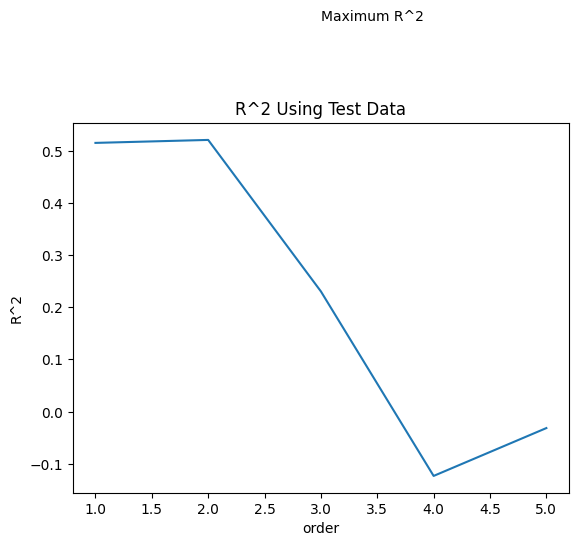

In [331]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

Rsqu_test = []

order = [1, 2, 3, 4, 5]

for n in order:
    pr = PolynomialFeatures(degree=n)
    x_train_pr = pr.fit_transform(x_train[['Population']])
    x_test_pr = pr.transform(x_test[['Population']])
    model2=LinearRegression()
    model2.fit(x_train_pr, y_train)
    y_test_predicted = model2.predict(x_test_pr)
    Rsqu_test.append(r2_score(y_test, y_test_predicted))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')

print(Rsqu_test)



Візуалізую моделі (зручно розміщувати всі моделі на одному графіку для обрання найкращої) та показник їх якості (доцільно побудувати графік залежності R^2 або MSE від порядку поліному моделі)

Найкращою є модель 2 ступеня, бо для 3 ступеня вже спостерігається перенавчання.


<a name="task4"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task4">Завдання  #4: </h2>

<p>Побудуйте модель гребеневої регресії для двох найкращих предикторів. Параметр alpha повинен бути встановлений на 10. Обчисліть R^2.</p>
</div>


Будую модель гребеневої регресії, обчислюю R^2


In [336]:
# Виконую поліноміальне перетворення 2 ступеня для двох обраних ознак
pr_greb = PolynomialFeatures(degree=2)
x_train_pr_greb = pr_greb.fit_transform(x_train[['Population', 'Area']])
x_test_pr_greb = pr_greb.transform(x_test[['Population', 'Area']])

In [338]:
# Створюю об’єкт гребеневої регресії, встановивши параметр alpha=10
from sklearn.linear_model import Ridge
RidgeModel = Ridge(alpha=10)
RidgeModel.fit(x_train_pr_greb, y_train)
predict = RidgeModel.predict(x_test_pr_greb)
r2 = r2_score(y_test, predict)
print(r2)

-1.8141470300330806


/Users/saszco/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.50471e-36): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


<a name="task5"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task5">Завдання  #5: </h2>

<p>Виконайте пошук по сітці для параметра alpha та параметра нормалізації, а потім побудуйте модель, використавши найкращі значення параметрів.</p>
</div>


Створюю словник значень параметрів:


In [358]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('ridge', Ridge()),
])

parameters = {
    'ridge__alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000],
    'scaler__with_mean': [True, False]
}

Створюю об’єкт сітки пошуку параметра гребеневої регресії:


In [361]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
Grid = GridSearchCV(pipe, parameters, cv=5)

Підбираю модель:


In [362]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
Grid.fit(x_data[['Population', 'Area']], y_data)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('poly', PolynomialFeatures()),
                                       ('ridge', Ridge())]),
             param_grid={'ridge__alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000],
                         'scaler__with_mean': [True, False]})

Отримую модель з найкращими параметрами:


In [363]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
BestModel = Grid.best_estimator_
BestModel

Pipeline(steps=[('scaler', StandardScaler(with_mean=False)),
                ('poly', PolynomialFeatures()), ('ridge', Ridge(alpha=100))])

Тестую модель на тестових даних (обчислюю R^2):


In [364]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
BestModel.score(x_test[['Population', 'Area']], y_test)

0.5835238365671322

<a name="task6"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task6"> Додаткове завдання: </h2>

<p>Побудуйте візуалізації для оцінки якості моделей (лінійної, кращої з поліноміальних та кращої з гребеневих), всі розмістіть на одній координатній сітці для зручного порівняння.</p>
</div>


Використаю метод "predict", щоб спрогнозувати результати, а потім скористаюсь функцією "DistributionPlot", щоб відобразити розподіл прогнозованих результатів для тестових даних порівняно з фактичними для тестових даних.


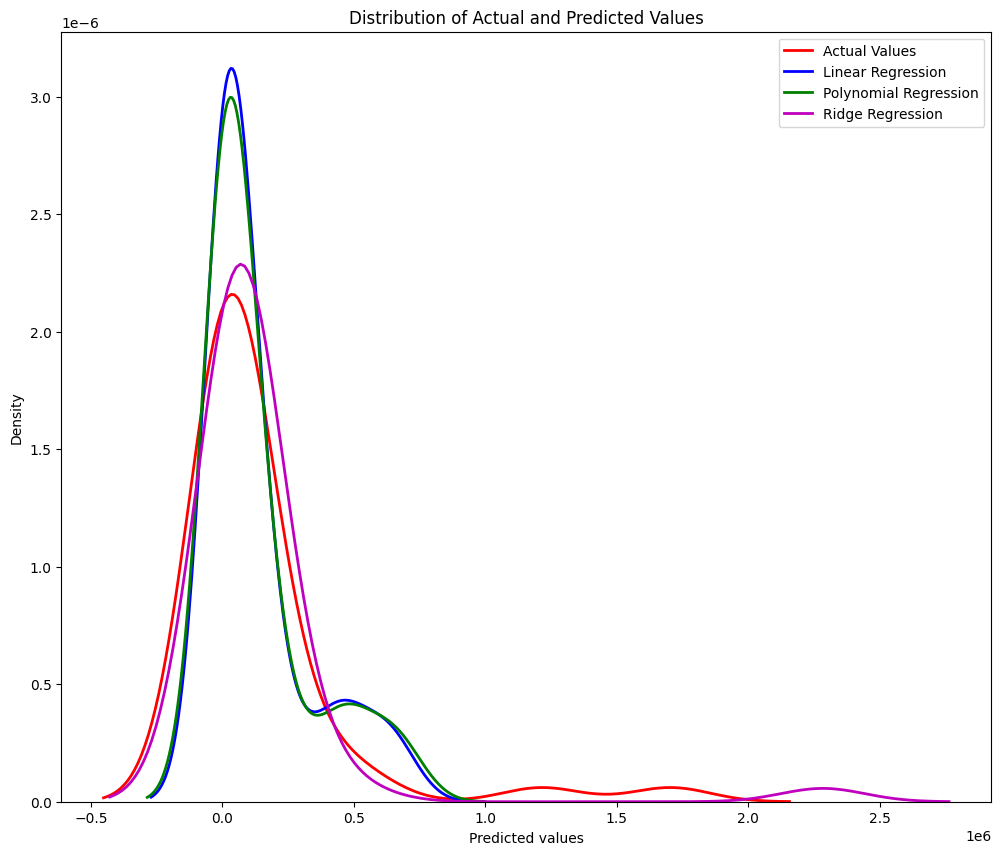

In [367]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
# %pip install seaborn
import seaborn as sns

def DistributionPlotMulti (y_actual, predictions, labels, title):
    plt.figure(figsize=(12, 10))
    sns.kdeplot(y_actual, label="Actual Values", color="r", linewidth=2)

    colors = ['b', 'g', 'm', 'c']
    for i, y_pred in enumerate(predictions):
        sns.kdeplot(y_pred, label=labels[i], color=colors[i], linewidth=2)

    plt.title(title)
    plt.xlabel('Predicted values')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

yhat1 = model1.predict(x_test[['Population']])

pr2 = PolynomialFeatures(degree=2)
x_train_pr2 = pr2.fit_transform(x_train[['Population']])
x_test_pr2 = pr2.transform(x_test[['Population']])
model2=LinearRegression()
model2.fit(x_train_pr2, y_train)

yhat2 = model2.predict(x_test_pr2)
yhat3 = BestModel.predict(x_test[['Population', 'Area']])

DistributionPlotMulti(y_test, [yhat1, yhat2, yhat3], ['Linear Regression', 'Polynomial Regression', 'Ridge Regression'], 'Distribution of Actual and Predicted Values')

<h4>Висновок</h4>

<p>Порівнюючи всі моделі, роблю висновок, що <b>модель Ridge є найкращою моделлю</b> для прогнозування 'CO2 emission' на основі нашого набору даних. </p>

<h2>Виконав студент групи ІП-33 <br> Корольчук Олександр</h2>
